IMPORTING NECESSARY LIBRARIES AND READING FILE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [4]:
# Download latest version
img = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")
print("Path to dataset files:", img)

Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [5]:
from pathlib import Path
train_dir = Path('/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train/')

train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/test/')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/val/')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [6]:
def create_dataframe(filepaths):
    data = {'img': [str(filepath) for filepath in filepaths],
            'label': [Path(filepath).parent.name for filepath in filepaths]}
    return pd.DataFrame(data)

df_train = create_dataframe(train_filepaths)
df_test = create_dataframe(test_filepaths)
df_val = create_dataframe(val_filepaths)

DATA PREPROCESSING

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=30, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_val_datagen = ImageDataGenerator(rescale=1.0/255)

In [8]:
# Check original labels before mapping
original_labels_train = [Path(filepath).parent.name for filepath in train_filepaths]
unique_labels_train = set(original_labels_train)

print("Unique original labels in training dataset:", unique_labels_train)

Unique original labels in training dataset: {'pear', 'garlic', 'corn', 'tomato', 'spinach', 'soy beans', 'kiwi', 'jalepeno', 'orange', 'sweetcorn', 'lemon', 'raddish', 'beetroot', 'pomegranate', 'onion', 'lettuce', 'mango', 'sweetpotato', 'banana', 'ginger', 'peas', 'pineapple', 'eggplant', 'cauliflower', 'paprika', 'turnip', 'chilli pepper', 'capsicum', 'cucumber', 'bell pepper', 'potato', 'watermelon', 'cabbage', 'carrot', 'grapes', 'apple'}


In [9]:
fruit= {
    'banana', 'apple', 'pear', 'grapes', 'orange', 'kiwi', 'watermelon',
    'pomegranate', 'pineapple', 'mango'
}

# Map labels to 'Fruit' or 'Vegetable'
df_train['label'] = df_train['label'].apply(lambda x: 'Fruit' if x in fruit else 'Vegetable')
df_val['label'] = df_val['label'].apply(lambda x: 'Fruit' if x in fruit else 'Vegetable')
df_test['label'] = df_test['label'].apply(lambda x: 'Fruit' if x in fruit else 'Vegetable')

# Verify the mapping
print("Unique labels after mapping (training set):", df_train['label'].unique())
print("Label distribution after mapping (training set):\n", df_train['label'].value_counts())

Unique labels after mapping (training set): ['Vegetable' 'Fruit']
Label distribution after mapping (training set):
 label
Vegetable    2042
Fruit         738
Name: count, dtype: int64


In [10]:
# Verify the mapping
print(df_train['label'].value_counts())
print(df_val['label'].value_counts())
print(df_test['label'].value_counts())

label
Vegetable    2042
Fruit         738
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
label
Vegetable    241
Fruit         93
Name: count, dtype: int64


GENERATING DATA GENERATORS

In [11]:
print("Unique labels in training set:", df_train['label'].unique())
print("Label distribution in training set:\n", df_train['label'].value_counts())

Unique labels in training set: ['Vegetable' 'Fruit']
Label distribution in training set:
 label
Vegetable    2042
Fruit         738
Name: count, dtype: int64


In [12]:
# Check if the validation directory exists and list its contents
val_dir = Path('/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/val/')
val_images = list(val_dir.glob(r'**/*.jpg'))
print(f"Number of images in validation directory: {len(val_images)}")

Number of images in validation directory: 0


In [13]:
if 'Fruit' not in df_train['label'].values or 'Vegetable' not in df_train['label'].values:
    print("One of the categories is missing. Check the mapping logic or dataset distribution.")

TRAIN TEST SPLIT

In [14]:
# Split the training file paths into train and validation sets (80% train, 20% validation)
train_filepaths_split, val_filepaths_split = train_test_split(train_filepaths, test_size=0.2, random_state=42)

# Create new DataFrames for train and validation
df_train = create_dataframe(train_filepaths_split)
df_val = create_dataframe(val_filepaths_split)


print("New training DataFrame shape:", df_train.shape)
print("New validation DataFrame shape:", df_val.shape)
print("First few rows of new validation set:\n", df_val.head())

New training DataFrame shape: (2224, 2)
New validation DataFrame shape: (556, 2)
First few rows of new validation set:
                                                  img        label
0  /root/.cache/kagglehub/datasets/kritikseth/fru...       grapes
1  /root/.cache/kagglehub/datasets/kritikseth/fru...       turnip
2  /root/.cache/kagglehub/datasets/kritikseth/fru...  bell pepper
3  /root/.cache/kagglehub/datasets/kritikseth/fru...       garlic
4  /root/.cache/kagglehub/datasets/kritikseth/fru...       tomato


In [15]:
# Map labels in both train and validation sets
df_train['label'] = df_train['label'].apply(lambda x: 'Fruit' if x in fruit else 'Vegetable')
df_val['label'] = df_val['label'].apply(lambda x: 'Fruit' if x in fruit else 'Vegetable')

# Verify the label distribution
print("Label distribution in training set:\n", df_train['label'].value_counts())
print("Label distribution in validation set:\n", df_val['label'].value_counts())

Label distribution in training set:
 label
Vegetable    1644
Fruit         580
Name: count, dtype: int64
Label distribution in validation set:
 label
Vegetable    398
Fruit        158
Name: count, dtype: int64


In [16]:
train_gen = train_datagen.flow_from_dataframe(
    df_train,
    x_col='img',
    y_col='label',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32
)

val_gen = test_val_datagen.flow_from_dataframe(
    df_val,
    x_col='img',
    y_col='label',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32
)

test_gen = test_val_datagen.flow_from_dataframe(
    df_test,
    x_col='img',
    y_col='label',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)


Found 2224 validated image filenames belonging to 2 classes.
Found 556 validated image filenames belonging to 2 classes.
Found 334 validated image filenames belonging to 2 classes.


MODEL BUILDING

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])


In [18]:
#COMPILE THE MODEL

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

MODEL TRAINING

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=[early_stopping])

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 74s 950ms/step - accuracy: 0.7633 - loss: 0.4752 - val_accuracy: 0.7482 - val_loss: 0.4952
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 79s 947ms/step - accuracy: 0.7596 - loss: 0.4827 - val_accuracy: 0.7590 - val_loss: 0.4800
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 73s 954ms/step - accuracy: 0.7380 - loss: 0.5030 - val_accuracy: 0.7842 - val_loss: 0.4607
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 80s 943ms/step - accuracy: 0.7419 - loss: 0.4920 - val_accuracy: 0.7842 - val_loss: 0.4499
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 71s 949ms/step - accuracy: 0.7557 - loss: 0.4640 - val_accuracy: 0.7734 - val_loss: 0.4431
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 70s 921ms/step - accuracy: 0.7487 - loss: 0.4818 - val_accuracy: 0.7788 - val_loss: 0.4327
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.7749 - loss: 0.4662 - val_accuracy: 0.7626 - val_loss: 0.4503
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7801 - loss: 0.4444 - val_accuracy: 

MODEL EVALUATION

In [21]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9090 - loss: 0.2287
Test Accuracy: 86.83%


DATA VISUALIZATION

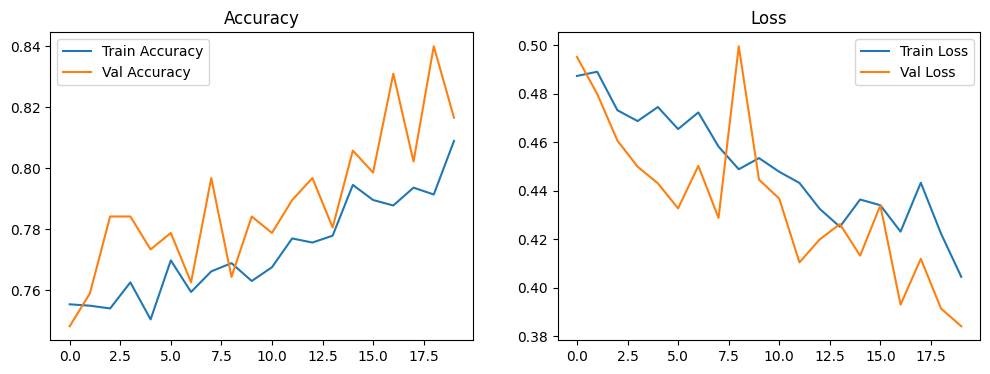

In [23]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [24]:

## TESTING WITH INDIVIDUAL IMAGES

from tensorflow.keras.preprocessing import image

# Test with a single image
img_path = '/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/train/spinach/Image_8.jpg'

img_test = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img_test) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print(f"Prediction for {Path(img_path).name}: {'Vegetable' if prediction[0][0] > 0.5 else 'Fruit'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
Prediction for Image_8.jpg: Vegetable
